In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import random
import scanpy as sc
import seaborn as sns
import sklearn
import umap.umap_ as umap

from pathlib import Path

np.random.seed(1)
random.seed(1)

In [21]:
import util
import importlib
importlib.reload(util)

N_genes, N_dims, gpt_embeddings = util.retrieve_gpt_gene_embeddings()
print(f"(N_genes, N_dims) = {N_genes}, {N_dims}") 

(N_genes, N_dims) = 93800, 1536


In [19]:
sampled_aorta_data = sc.read_h5ad(util.data_dir / "sample_aorta_data_updated.h5ad")
N_cells = sampled_aorta_data.n_obs
N_genes = sampled_aorta_data.n_vars
print(f"(N_genes, N_cells) = {N_genes}, {N_cells}")

(N_genes, N_cells) = 23331, 9625


/Users/dustinm/projects/GPT-scEmbed/venv/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [22]:
sampled_aorta_data_gpt_embeddings = util.generate_w_gpt_embeddings(N_dims, sampled_aorta_data, gpt_embeddings)
sampled_aorta_data_gpt_embeddings.shape

(9625, 1536)

/Users/dustinm/projects/GPT-scEmbed/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


([], [])

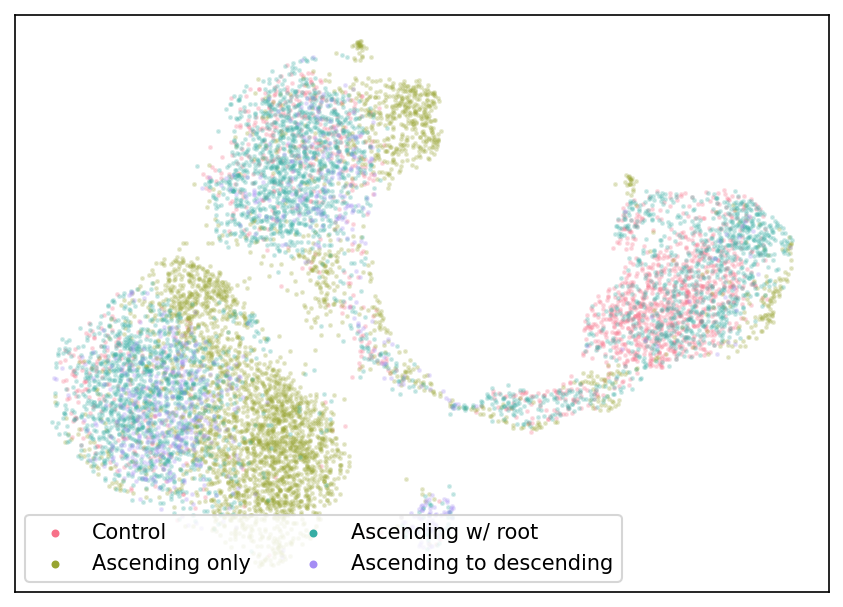

In [23]:
pca = sklearn.decomposition.PCA(n_components=50)
pca_result = pca.fit_transform(sampled_aorta_data_gpt_embeddings)

embedding_sanity_check = umap.UMAP(min_dist=0.5, spread=1).fit_transform(pca_result)

plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(7,5), dpi=150)

np.random.seed(1)
random.seed(1)

all_labels = np.unique(sampled_aorta_data.obs.phenotype)
random.shuffle(all_labels)
colors = sns.color_palette('husl', len(all_labels))
for i, label_name in enumerate(all_labels):
    plt.scatter(embedding_sanity_check[sampled_aorta_data.obs.phenotype==label_name, 0], 
                        embedding_sanity_check[sampled_aorta_data.obs.phenotype==label_name, 1], s= 2,
                        label=label_name,color=colors[i],alpha=0.2)
leg = plt.legend(prop={'size': 10},loc='lower left',ncol=2)
plt.rcParams["legend.markerscale"] = 2.0
for lh in leg.legend_handles: 
    lh.set_alpha(1)
plt.xticks([])
plt.yticks([])

([], [])

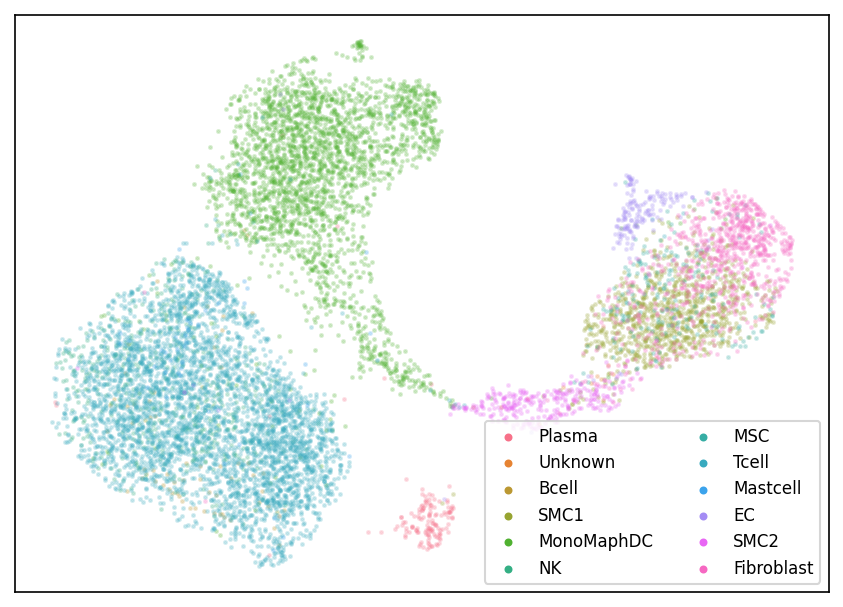

In [24]:
plt.rcParams['axes.facecolor']='white'
plt.figure(figsize=(7,5), dpi=150) 

np.random.seed(1)
random.seed(1)

all_labels = np.unique(sampled_aorta_data.obs.celltype)
random.shuffle(all_labels)
colors = sns.color_palette('husl', len(all_labels))
for i, label_name in enumerate(all_labels):
    plt.scatter(embedding_sanity_check[sampled_aorta_data.obs.celltype==label_name, 0], 
                        embedding_sanity_check[sampled_aorta_data.obs.celltype==label_name, 1], s= 2,
                        label=label_name,color=colors[i],alpha=0.2)
leg = plt.legend(prop={'size': 8},loc='lower right',ncol=2)
plt.rcParams["legend.markerscale"] = 2.0
for lh in leg.legend_handles: 
    lh.set_alpha(1)
plt.xticks([])
plt.yticks([])

([], [])

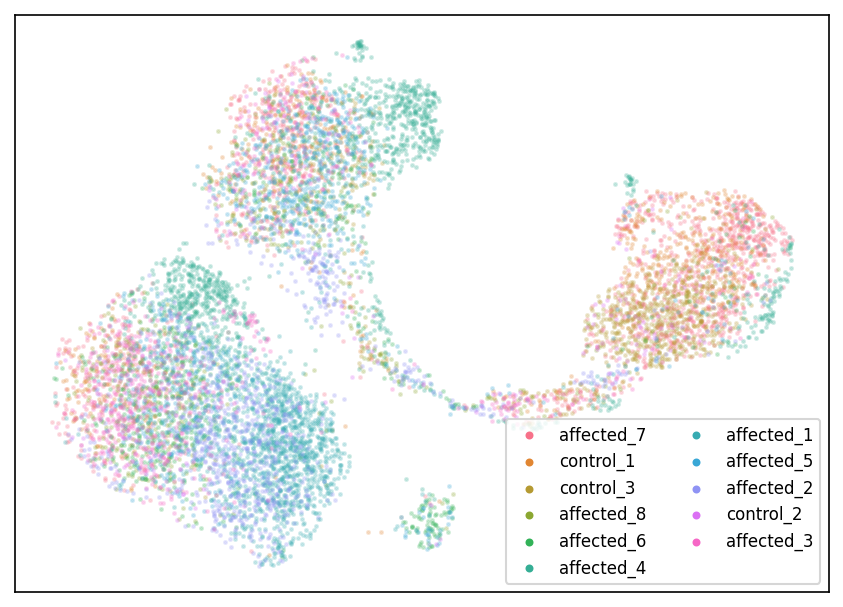

In [25]:
plt.rcParams['axes.facecolor']='white'
plt.figure(figsize=(7,5), dpi=150) 

np.random.seed(1)
random.seed(1)

all_labels = np.unique(sampled_aorta_data.obs.patient)
random.shuffle(all_labels)
colors = sns.color_palette('husl', len(all_labels))
for i, label_name in enumerate(all_labels):
    plt.scatter(embedding_sanity_check[sampled_aorta_data.obs.patient==label_name, 0], 
                        embedding_sanity_check[sampled_aorta_data.obs.patient==label_name, 1], s= 2,
                        label=label_name,color=colors[i],alpha=0.2)
leg = plt.legend(prop={'size': 8},loc='lower right',ncol=2)
plt.rcParams["legend.markerscale"] = 2.0
for lh in leg.legend_handles: 
    lh.set_alpha(1)
plt.xticks([])
plt.yticks([])